## Project

Every year, there are countless large and small academic conferences held at the international level, and a very large number of papers are published. In some large academic conferences in the field of computing, hundreds of papers covering various directions can be presented at one time. Clustering the papers by their topics and contents helps one to find and get the desired papers efficiently. The data in this case comes from about 400 articles published at AAAI 2014, which are made publicly available by [UCI](https://archive.ics.uci.edu/ml/datasets/AAAI+2014+Accepted+Papers!), providing information including titles, authors, keywords, abstracts, and so on. It is hoped that you can reasonably construct feature vectors to represent these papers based on this information, and design and implement or invoke clustering algorithms to cluster the papers. Finally, you can also observe the clustering results to see what kind of papers are in each category and whether there are some themes.
 

## Vectorization

In [33]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("./Dataset/[UCI] AAAI-14 Accepted Papers - Papers.csv")
data

,title,authors,groups,keywords,topics,abstract
0,Kernelized Bayesian Transfer Learning,Mehmet Gönen and Adam A. Margolin,Novel Machine Learning Algorithms (NMLA),cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Transfer learning considers related but distin...
1,"""Source Free"" Transfer Learning for Text Class...","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",AI and the Web (AIW)\nNovel Machine Learning A...,Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Transfer learning uses relevant auxiliary data...
2,A Generalization of Probabilistic Serial to Ra...,Haris Aziz and Paul Stursberg,Game Theory and Economic Paradigms (GTEP),social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,The probabilistic serial (PS) rule is one of t...
3,Lifetime Lexical Variation in Social Media,"Liao Lizi, Jing Jiang, Ying Ding, Heyan Huang ...",NLP and Text Mining (NLPTM),Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,As the rapid growth of online social media att...
4,Hybrid Singular Value Thresholding for Tensor ...,"Xiaoqin Zhang, Zhengyuan Zhou, Di Wang and Yi Ma",Knowledge Representation and Reasoning (KRR)\n...,tensor completion\nlow-rank recovery\nhybrid s...,KRR: Knowledge Representation (General/Other)\...,"In this paper, we study the low-rank tensor co..."
...,...,...,...,...,...,...
393,Mapping Users Across Networks by Manifold Alig...,"Shulong Tan, Ziyu Guan, Deng Cai, Xuzhen Qin, ...",AI and the Web (AIW),Social Networks\nManifold Alignment\nHypergrap...,AIW: Machine learning and the web\nAIW: Ontolo...,Nowadays many people are members of multiple o...
394,Compact Aspect Embedding For Diversified Query...,"Xiaohua Liu, Arbi Bouchoucha, Jian-Yun Nie and...",AI and the Web (AIW),query expansion\nsearch result diversification...,AIW: Enhancing web search and information retr...,Diversified query expansion (DQE) based approa...
395,Contraction and Revision over DL-Lite TBoxes,"Zhiqiang Zhuang, Zhe Wang, Kewen Wang and Guil...",Knowledge Representation and Reasoning (KRR),Belief Change\nDescription Logic\nNon-monotoni...,KRR: Belief Change\nKRR: Description Logics\nK...,An essential task in managing DL ontologies is...
396,Zero Pronoun Resolution as Ranking,Chen Chen and Vincent Ng,NLP and Text Mining (NLPTM),Zero Pronouns\nText Mining\nNatural Language P...,NLPTM: Evaluation and Analysis,"Compared to overt pronoun resolution, there is..."


### Kmeans 

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

abstract = data["abstract"]
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(abstract)

# using kmeans to clustering
n_clusters = 10
km = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
km.fit(X)
clusters = km.labels_
data["cluster"] = clusters
data[["title", "cluster"]].head(10)

,title,cluster
0,Kernelized Bayesian Transfer Learning,0
1,"""Source Free"" Transfer Learning for Text Class...",0
2,A Generalization of Probabilistic Serial to Ra...,5
3,Lifetime Lexical Variation in Social Media,3
4,Hybrid Singular Value Thresholding for Tensor ...,1
5,Locality Preserving Hashing,1
6,Discovering Better AAAI Keywords via Clusterin...,4
7,Online Classification Using a Voted RDA Method,0
8,Fraudulent Support Telephone Number Identifica...,0
9,Supervised Hashing for Image Retrieval via Ima...,3


In [12]:
X.shape

(398, 5804)

### PCA with 2 components

In [36]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)

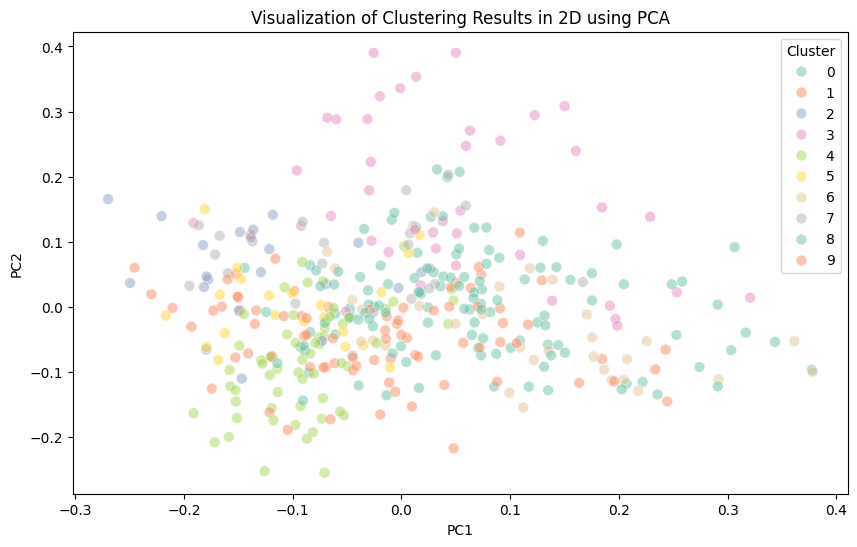

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette="Set2", s=60, alpha=0.5, legend='full')
plt.title("Visualization of Clustering Results in 2D using PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

### PCA with 3 components 

In [41]:
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(X)
reduced_features

array([[ 0.31666293, -0.03959791,  0.19504167],
       [ 0.2908975 ,  0.00351975,  0.23756666],
       [-0.18081382,  0.1500151 , -0.02989096],
       ...,
       [-0.06554088, -0.01471895,  0.03684541],
       [ 0.04533585,  0.04501472,  0.05470468],
       [ 0.34361291, -0.05372604,  0.33432725]])

In [47]:
reduced_features.shape

(398, 3)

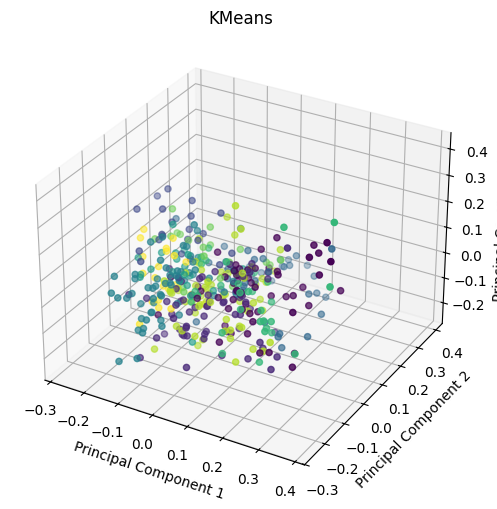

In [46]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=clusters)
ax.set_title('Visualization of Clustering Results in 3D using PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

In [61]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(abstract)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
pca_data = pca.fit_transform(tfidf_matrix.toarray())
pca_data.shape

# n_components can either be an integer (indicating the number of principal components) or a float between 0 and 1 (indicating the amount of variance to retain).
# When set to 0.95, PCA will select the number of components needed to explain 95% of the total variance in the data.

(398, 312)

## Evaluating Model

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
n = range(2, 15)
for i in n:
    kmeans = KMeans(n_clusters=i, n_init=10, init="k-means++", random_state=42, max_iter=300)
    kmeans.fit(pca_data)
    score = silhouette_score(pca_data, kmeans.labels_)
    scores.append(score)

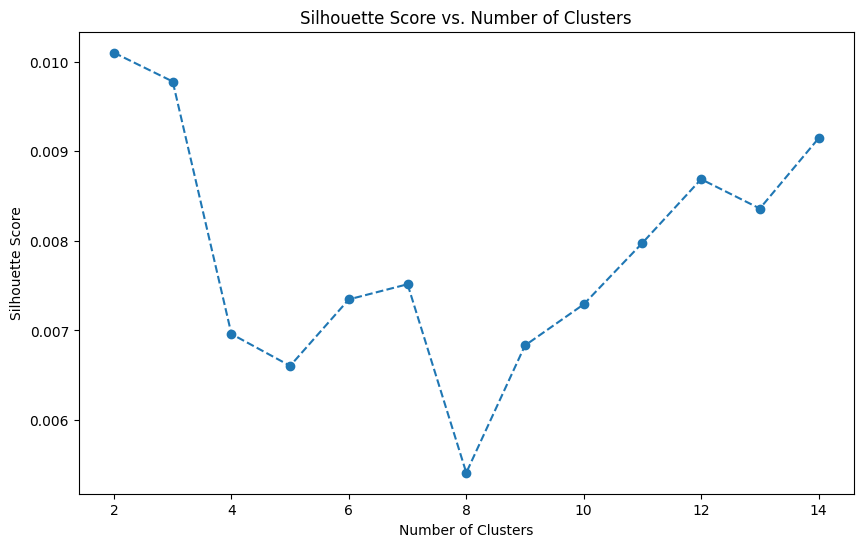

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(n, scores, marker='o', linestyle='--')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [71]:
kmeans.labels_

array([ 3,  3,  2, 12,  3,  3,  7,  4,  3,  8, 13,  5,  3,  4,  6,  5,  5,
        3,  8,  8,  9,  1,  8, 12,  1, 12,  3,  6, 12, 12,  9,  1,  4,  7,
        0,  4,  5,  0,  8, 11,  8,  6,  8,  0,  9,  7, 10,  6, 10,  5, 12,
        7, 12,  6,  6, 12,  5,  0,  8,  8,  9,  8, 12,  7,  4,  0,  5,  2,
        3,  3,  2,  4,  8,  6,  8,  3,  1,  0,  8,  9,  4,  8,  4,  8,  3,
       12,  6,  8,  7, 12,  8,  6,  1,  9,  2,  1, 10,  0,  7,  8,  5,  2,
        6, 11,  5,  6,  0,  1,  8, 13,  9,  4,  3,  5, 12,  5, 12,  0,  5,
        3,  2, 12,  3,  4,  9, 10,  3,  1,  8,  6,  7,  5,  7,  2,  9,  2,
       11,  8,  1,  8, 13,  5,  3,  2,  3,  0,  3,  0,  1,  0,  4, 10,  1,
        9,  5,  7, 12,  1,  3,  5,  0,  9, 11,  3,  7,  4,  9,  5,  5,  9,
        5,  0,  0,  5, 10,  0,  7,  6,  4,  4,  6,  2, 10, 10, 12, 13,  1,
        4,  2,  4,  6,  3,  3,  7,  3,  4,  5,  7,  1,  7, 13,  1,  8,  3,
        4,  4,  6,  0,  3,  3,  7,  6,  5,  3,  6,  7, 12,  4,  7,  8,  8,
        8,  7,  3,  6,  2

## Key Insight:
* From the contour coefficient plot, it can be seen that the contour coefficient reaches its maximum when the number of clusters is 3. For further visualization, we choose 3 as the number of clusters and perform KMeans clustering on the data after PCA dimensionality reduction. Then, we will visualize the clustering results using 3D coordinates.

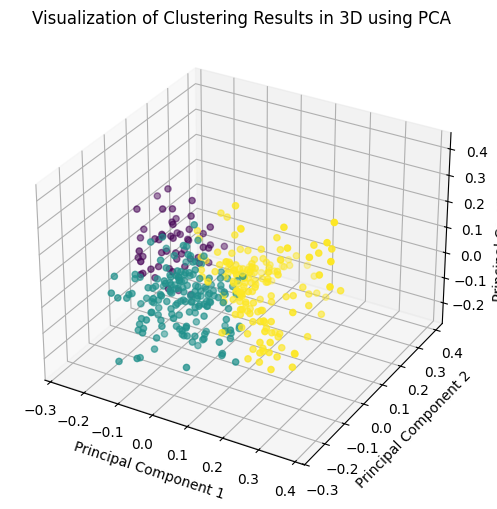

In [75]:
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, random_state=42)
kmeans.fit_predict(pca_data)
clusters = kmeans.labels_

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=clusters)
ax.set_title('Visualization of Clustering Results in 3D using PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

In [76]:
from sklearn.decomposition import NMF


In [79]:
X

<398x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 17540 stored elements in Compressed Sparse Row format>

In [80]:
model = NMF(n_components=6)
model.fit(X)
nmf_features = model.transform(X)
nmf_features


array([[0.08232663, 0.        , 0.00808165, 0.29224032, 0.00062558,
        0.        ],
       [0.01796034, 0.        , 0.02041976, 0.33562812, 0.        ,
        0.        ],
       [0.        , 0.04591337, 0.08959735, 0.        , 0.09354345,
        0.        ],
       ...,
       [0.00107777, 0.09084239, 0.02188275, 0.00256343, 0.        ,
        0.00300055],
       [0.        , 0.02071717, 0.03483284, 0.06222093, 0.0067798 ,
        0.06704865],
       [0.        , 0.        , 0.        , 0.43768279, 0.        ,
        0.        ]])

In [85]:
import numpy as np
import pandas as pd

# Create a fake document-term matrix (6 articles, 10 terms)
data = np.array([
    [1, 1, 1, 0, 0, 0, 2, 2, 0, 0],  # Article 1: about sports
    [0, 0, 1, 1, 1, 0, 2, 0, 0, 0],  # Article 2: about politics
    [1, 1, 0, 1, 0, 1, 0, 0, 1, 0],  # Article 3: about health
    [0, 0, 0, 0, 1, 1, 0, 0, 2, 2],  # Article 4: about technology
    [2, 0, 0, 0, 1, 0, 0, 1, 1, 1],  # Article 5: about business
    [0, 0, 0, 1, 0, 2, 0, 0, 1, 2],  # Article 6: about entertainment
])

# Create a DataFrame to give terms and titles for the articles
terms = ['soccer', 'basketball', 'government', 'elections', 'health', 'medicine', 'sports', 'league', 'AI', 'tech']
titles = ['Sports Article 1', 'Politics Article', 'Health Article', 'Tech Article', 'Business Article', 'Entertainment Article']

df = pd.DataFrame(data, columns=terms, index=titles)
print("Document-Term Matrix:")
df

Document-Term Matrix:


,soccer,basketball,government,elections,health,medicine,sports,league,AI,tech
Sports Article 1,1,1,1,0,0,0,2,2,0,0
Politics Article,0,0,1,1,1,0,2,0,0,0
Health Article,1,1,0,1,0,1,0,0,1,0
Tech Article,0,0,0,0,1,1,0,0,2,2
Business Article,2,0,0,0,1,0,0,1,1,1
Entertainment Article,0,0,0,1,0,2,0,0,1,2


In [86]:
from sklearn.decomposition import NMF

# Apply NMF to extract 3 topics
model = NMF(n_components=3, random_state=42)
nmf_features = model.fit_transform(data)

# Convert NMF features to a DataFrame for readability
nmf_df = pd.DataFrame(nmf_features, index=titles)
print("\nNMF Feature Matrix:")
print(nmf_df.round(2))  # Round for easier viewing



NMF Feature Matrix:
                          0     1     2
Sports Article 1       0.00  0.55  1.11
Politics Article       0.05  0.00  1.13
Health Article         0.28  0.35  0.03
Tech Article           0.75  0.03  0.00
Business Article       0.28  0.74  0.00
Entertainment Article  0.75  0.00  0.00


In [88]:
components_df = pd.DataFrame(model.components_, columns=terms)
print("\nNMF Components (Topics):")
components_df.round(2)



NMF Components (Topics):


,soccer,basketball,government,elections,health,medicine,sports,league,AI,tech
0,0.03,0.01,0.00,0.82,0.74,1.97,0.00,0.00,2.06,2.56
1,2.42,0.75,0.00,0.00,0.32,0.00,0.00,1.57,0.49,0.00
2,0.00,0.27,0.89,0.44,0.35,0.00,1.78,0.49,0.00,0.00


In [ ]:
import numpy as np
from scipy.special import rel_entr  # used for  divergence KL

# Two feature vectors (normalized as probability distributions)
P = np.array([0.2, 0.5, 0.3])
Q = np.array([0.1, 0.4, 0.5])

# Calcul divergence KL
div_kl = np.sum(rel_entr(P, Q))

print(f"Divergence KL: {div_kl}")


Divergence KL: 0.09695352463929671
